In [5]:
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline

In [6]:
data = pd.read_csv('F:/iit_D/Year 2/SDGP/togithub/Cyber---SDGP/dataset/dateindex1.csv',index_col=[0],parse_dates=True,squeeze=True)

In [7]:
type(data)

pandas.core.series.Series

In [8]:
data.head(5)

datetime
2005-01-01 00:00:00      0.0
2005-01-01 01:00:00     55.0
2005-01-01 02:00:00     41.0
2005-01-01 03:00:00    203.0
2005-01-01 04:00:00    421.0
Name: G(i), dtype: float64

<AxesSubplot:xlabel='datetime'>

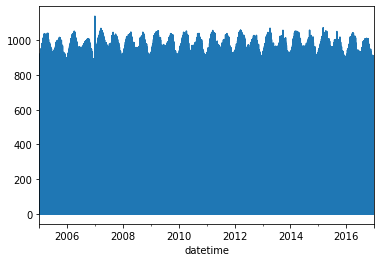

In [9]:
data.plot()

<AxesSubplot:xlabel='datetime'>

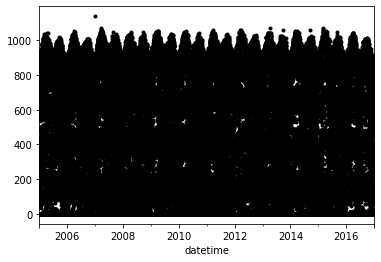

In [10]:
data.plot(style = 'k.')

In [11]:
data.describe()

count    105191.000000
mean        241.315436
std         332.620352
min           0.000000
25%           0.000000
50%           0.000000
75%         469.000000
max        1139.010000
Name: G(i), dtype: float64

In [12]:
# moving averagae
data_ma = data.rolling(window=8760).mean()#8760 is the number of hours in an year , window is for the no of first indexes we want to take the average

<AxesSubplot:xlabel='datetime'>

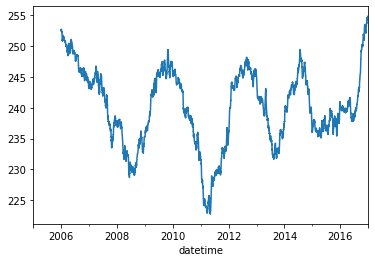

In [13]:
data_ma.plot()

In [14]:
# baseline
data_base = pd.concat([data,data.shift(1)],axis=1)

In [15]:
data_base

,G(i),G(i)
datetime,,
2005-01-01 00:00:00,0.0,NaN
2005-01-01 01:00:00,55.0,0.0
2005-01-01 02:00:00,41.0,55.0
2005-01-01 03:00:00,203.0,41.0
2005-01-01 04:00:00,421.0,203.0
...,...,...
2016-12-31 18:00:00,0.0,0.0
2016-12-31 19:00:00,0.0,0.0
2016-12-31 20:00:00,0.0,0.0


In [16]:
data_base.columns = ['Actual_G','Forecast_G']

In [17]:
data_base.columns

Index(['Actual_G', 'Forecast_G'], dtype='object')

In [18]:
data_base.head

<bound method NDFrame.head of                      Actual_G  Forecast_G
datetime                                 
2005-01-01 00:00:00       0.0         NaN
2005-01-01 01:00:00      55.0         0.0
2005-01-01 02:00:00      41.0        55.0
2005-01-01 03:00:00     203.0        41.0
2005-01-01 04:00:00     421.0       203.0
...                       ...         ...
2016-12-31 18:00:00       0.0         0.0
2016-12-31 19:00:00       0.0         0.0
2016-12-31 20:00:00       0.0         0.0
2016-12-31 21:00:00       0.0         0.0
2016-12-31 22:00:00       0.0         0.0

[105191 rows x 2 columns]>

In [19]:
data_base.dropna(inplace = True)

In [20]:
data_base

,Actual_G,Forecast_G
datetime,,
2005-01-01 01:00:00,55.0,0.0
2005-01-01 02:00:00,41.0,55.0
2005-01-01 03:00:00,203.0,41.0
2005-01-01 04:00:00,421.0,203.0
2005-01-01 05:00:00,135.0,421.0
...,...,...
2016-12-31 18:00:00,0.0,0.0
2016-12-31 19:00:00,0.0,0.0
2016-12-31 20:00:00,0.0,0.0


In [21]:
# calculate the error
from sklearn.metrics import mean_squared_error
import numpy as np

In [22]:
data_error = mean_squared_error(data_base.Actual_G,data_base.Forecast_G)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

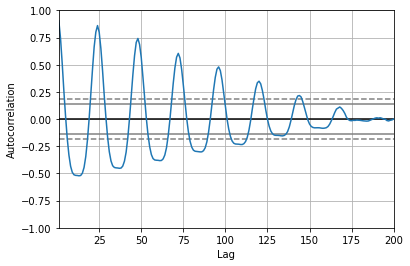

In [23]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data[0:200])

In [24]:
data_error

18104.970794756155

In [25]:
np.sqrt(data_error)

134.55471301576975

In [26]:
# ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

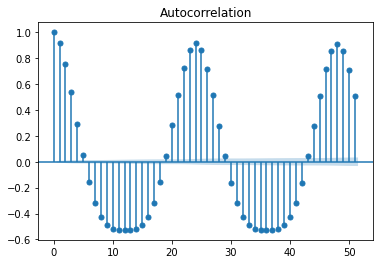

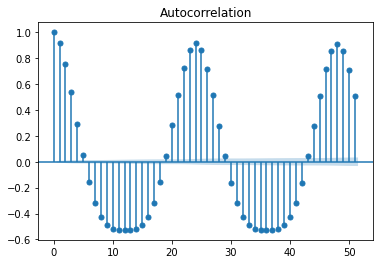

In [27]:
plot_acf(data)

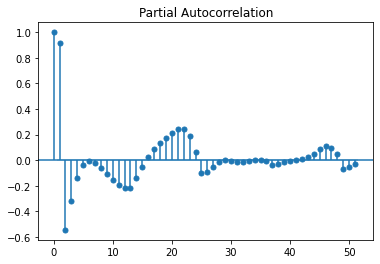

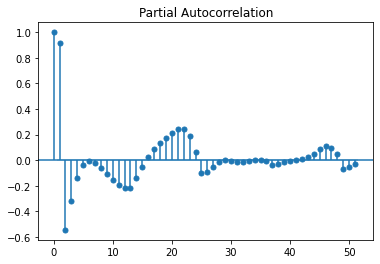

In [28]:
# idk whats q need to figure that out
plot_pacf(data)

In [29]:
from statsmodels.tsa.arima_model import ARIMA

In [30]:
data_train = data[0:8760]
data_test = data[8760:17520]

In [31]:
data_model = ARIMA(data_train,order=(2,1,3))

c:\python\python3.9.0\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\python\python3.9.0\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be u

In [32]:
data_model_fit = data_model.fit()

c:\python\python3.9.0\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [33]:
data_model_fit.aic

104422.81310921341

In [34]:
data_forecast = data_model_fit.forecast(steps = 8760)[0]

In [35]:
np.sqrt(mean_squared_error(data_test,data_forecast))

330.99482764465245

In [36]:
p_values = range(0,5)
d_values = range(0,3)
q_values = range(0,5)

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            train,test = data[0:700000],data[70000:100000]
            predictions = list()
            for i in range(len(test)):
                try:
                    model = ARIMA(train,order)
                    model_fit = model.fit(disp=0)
                    pred_y = model_fit.forecast()[0]
                    predections.append(pred_y)
                    error = mean_squared_error(test,predictions)
                    print('ARIMA%s : RMSE = % .2f'%(order,error))
                except:
                    continue